In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

df_common_player=pd.read_csv("common_player_info.csv")
df_draft_history=pd.read_csv("draft_history.csv")


In [2]:
merged3_df = pd.merge(df_draft_history, df_common_player, on='person_id', how='outer')

merged3_df.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id_x,team_city_x,team_name_x,team_abbreviation_x,organization,organization_type,player_profile_flag,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight,season_exp,jersey,position,rosterstatus,games_played_current_season_flag,team_id_y,team_name_y,team_abbreviation_y,team_code,team_city_y,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,79299,Clifton McNeeley,1947.0,1.0,1.0,1.0,Draft,1.610610e+09,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78109,Glen Selbo,1947.0,1.0,2.0,2.0,Draft,1.610610e+09,Toronto,Huskies,HUS,Wisconsin,College/University,1.0,Glen,Selbo,Glen Selbo,"Selbo, Glen",G. Selbo,glen-selbo,1926-03-29 00:00:00,Wisconsin,USA,Wisconsin/USA,6-3,196.0,1.0,NaN,Forward,Inactive,N,1.610610e+09,Redskins,SHE,redskins,Sheboygan,HISTADD_glen_selbo,1949.0,1949.0,N,Y,Y,1947,1,2,N
2,76649,Eddie Ehlers,1947.0,1.0,3.0,3.0,Draft,1.610613e+09,Boston,Celtics,BOS,Purdue,College/University,1.0,Eddie,Ehlers,Eddie Ehlers,"Ehlers, Eddie",E. Ehlers,eddie-ehlers,1923-03-10 00:00:00,Purdue,USA,Purdue/USA,6-3,198.0,2.0,14,Guard,Inactive,N,1.610613e+09,Celtics,BOS,celtics,Boston,HISTADD_bulbs_ehlers,1947.0,1948.0,N,Y,Y,1947,1,3,N
3,79302,Walt Dropo,1947.0,1.0,4.0,4.0,Draft,1.610610e+09,Providence,Steamrollers,PRO,Connecticut,College/University,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77048,Dick Holub,1947.0,1.0,5.0,5.0,Draft,1.610613e+09,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
greatest_75_players = merged3_df.loc[merged3_df['greatest_75_flag'] == 'Y', ['display_fi_last', 'overall_pick']]

pd.set_option('display.max_rows', None)


# Afficher les noms et numéros de draft
print(greatest_75_players)

       display_fi_last  overall_pick
83          D. Schayes           4.0
270           B. Cousy           3.0
344         B. Sharman           0.0
345          P. Arizin           0.0
706          B. Pettit           2.0
806         B. Russell           2.0
829          E. Baylor           0.0
830          E. Baylor           1.0
1155    W. Chamberlain           0.0
1156      O. Robertson           1.0
1157           J. West           2.0
1161        L. Wilkens           6.0
1368       J. Havlicek           7.0
1465    D. DeBusschere           0.0
1469       N. Thurmond           3.0
1557           W. Reed           8.0
1651          R. Barry           2.0
1653     B. Cunningham           5.0
1764        W. Frazier           5.0
1934          E. Hayes           1.0
1935         W. Unseld           2.0
2142   K. Abdul-Jabbar           1.0
2363         D. Cowens           4.0
2378      N. Archibald          19.0
2836         B. McAdoo           2.0
2846         J. Erving          12.0
3

In [5]:
greatest_75_players_clean = greatest_75_players.dropna(subset=['overall_pick'])

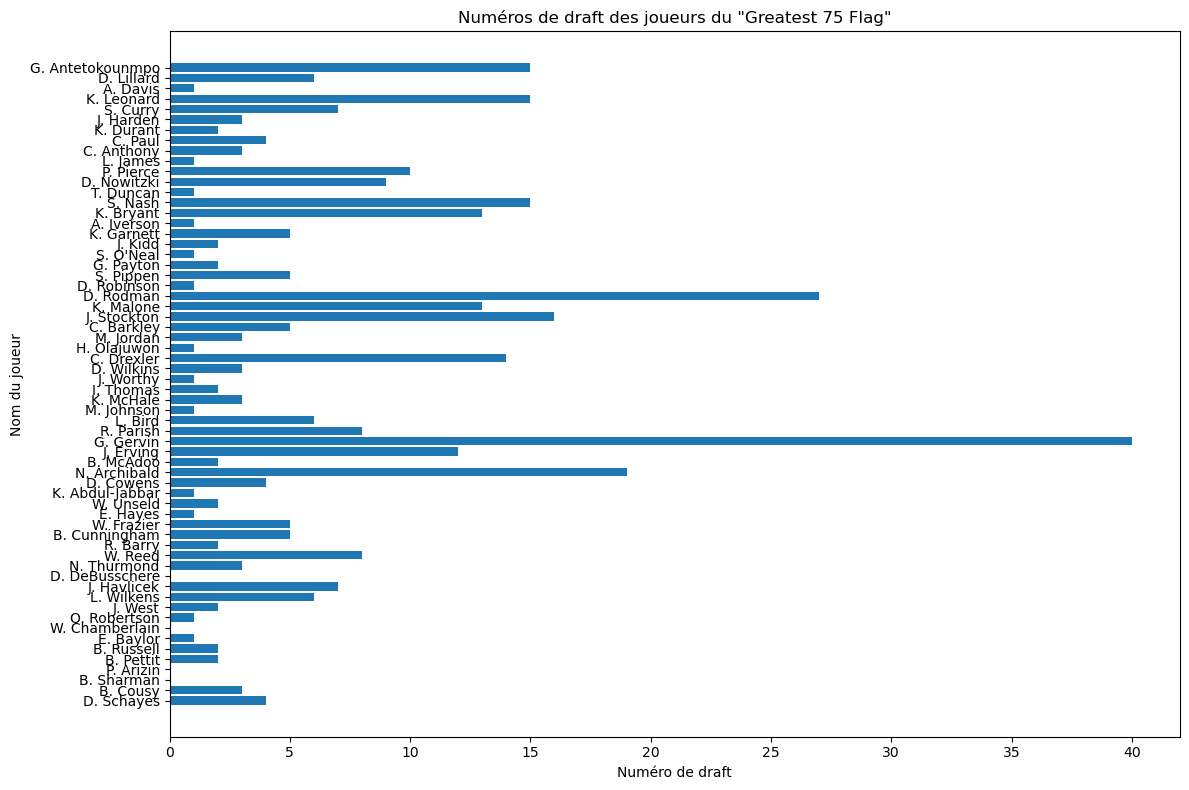

In [6]:
# Créer un graphique à barres horizontales
plt.figure(figsize=(12, 8))
plt.barh(greatest_75_players_clean['display_fi_last'], greatest_75_players_clean['overall_pick'])
plt.xlabel('Numéro de draft')
plt.ylabel('Nom du joueur')
plt.title('Numéros de draft des joueurs du "Greatest 75 Flag"')
plt.tight_layout()
plt.show()

In [7]:
# Filtrer les lignes où greatest_75_flag est 'Y'
greatest_75_players = merged3_df[merged3_df['greatest_75_flag'] == 'Y']

# Calculer la moyenne de overall_pick pour les joueurs du greatest 75
moyenne_draft_pick = greatest_75_players['overall_pick'].mean()

print(f"La moyenne des numéros de draft pour les joueurs du 'greatest 75' est : {moyenne_draft_pick:.2f}")

La moyenne des numéros de draft pour les joueurs du 'greatest 75' est : 5.67


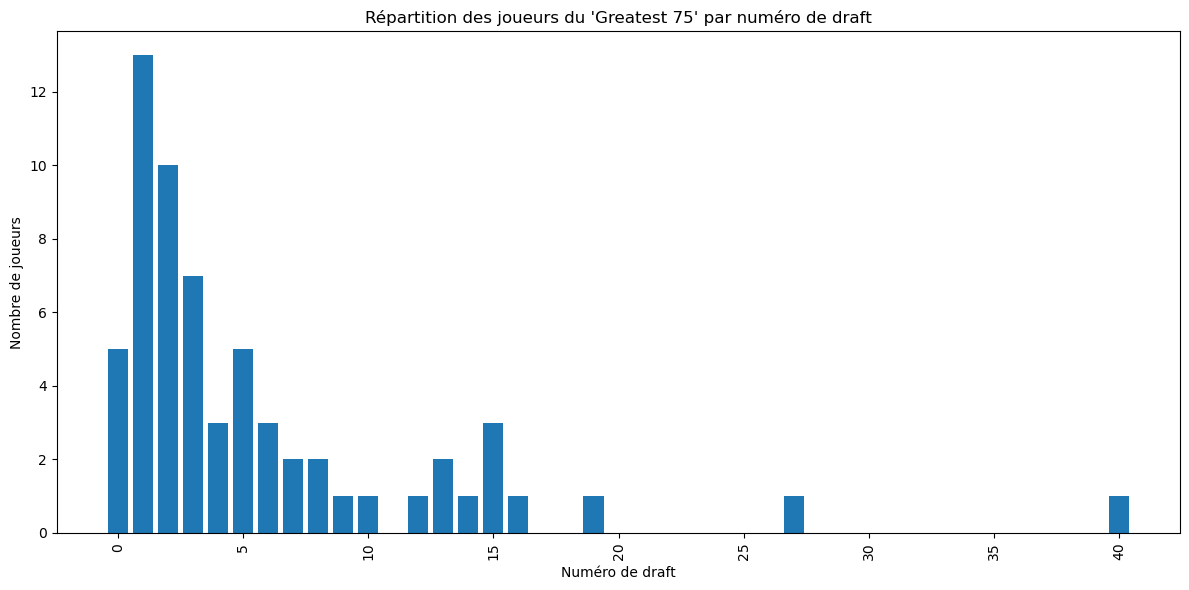

In [8]:
# Compter le nombre de joueurs pour chaque numéro de draft
draft_picks_count = greatest_75_players_clean['overall_pick'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(12, 6))
plt.bar(draft_picks_count.index, draft_picks_count.values)
plt.xlabel('Numéro de draft')
plt.ylabel('Nombre de joueurs')
plt.title("Répartition des joueurs du 'Greatest 75' par numéro de draft")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()